# Import Libraries 

In [1]:
import pandas as pd 
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

from matplotlib.colors import ListedColormap
from warnings import filterwarnings 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

pd.options.display.max_columns = None
pd.options.display.max_rows = None
# filterwarnings('ignore')


# Import dataset

In [2]:
# aniList = pd.read_csv(io.BytesIO(uploaded['AnimeList.csv']))
url = 'https://raw.githubusercontent.com/Ninelie-Nananai/AnimeListApi/main/AnimeList.csv'
aniList = pd.read_csv(url)
data = aniList.copy()
data2 = aniList.copy()

# Feature นำเข้า  *****


In [3]:
aniList.head()

anime_id                title              title_english title_japanese  \
0     11013        Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   
1      2104     Seto no Hanayome      My Bride is a Mermaid          瀬戸の花嫁   
2      5262   Shugo Chara!! Doki         Shugo Chara!! Doki    しゅごキャラ！！どきっ   
3       721        Princess Tutu              Princess Tutu      プリンセスチュチュ   
4     12365  Bakuman. 3rd Season                   Bakuman.          バクマン。   

                                  title_synonyms  \
0                                Youko x Boku SS   
1                           The Inland Sea Bride   
2  Shugo Chara Ninenme, Shugo Chara! Second Year   
3                                            NaN   
4                               Bakuman Season 3   

                                           image_url type    source  episodes  \
0  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        12   
1  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        26   
2  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        51   
3  https://myanimelist.cdn-dena.com/images/anime/...   TV  Original        38   
4  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        25   

            status  airing                  aired_string  \
0  Finished Airing   False  Jan 13, 2012 to Mar 30, 2012   
1  Finished Airing   False    Apr 2, 2007 to Oct 1, 2007   
2  Finished Airing   False   Oct 4, 2008 to Sep 25, 2009   
3  Finished Airing   False  Aug 16, 2002 to May 23, 2003   
4  Finished Airing   False   Oct 6, 2012 to Mar 30, 2013   

                                        aired         duration  \
0  {'from': '2012-01-13', 'to': '2012-03-30'}  24 min. per ep.   
1  {'from': '2007-04-02', 'to': '2007-10-01'}  24 min. per ep.   
2  {'from': '2008-10-04', 'to': '2009-09-25'}  24 min. per ep.   
3  {'from': '2002-08-16', 'to': '2003-05-23'}  16 min. per ep.   
4  {'from': '2012-10-06', 'to': '2013-03-30'}  24 min. per ep.   

                      rating  score  scored_by    rank  popularity  members  \
0  PG-13 - Teens 13 or older   7.63     139250  1274.0         231   283882   
1  PG-13 - Teens 13 or older   7.89      91206   727.0         366   204003   
2              PG - Children   7.55      37129  1508.0        1173    70127   
3  PG-13 - Teens 13 or older   8.21      36501   307.0         916    93312   
4  PG-13 - Teens 13 or older   8.67     107767    50.0         426   182765   

   favorites                                         background    premiered  \
0       2809  Inu x Boku SS was licensed by Sentai Filmworks...  Winter 2012   
1       2579                                                NaN  Spring 2007   
2        802                                                NaN    Fall 2008   
3       3344  Princess Tutu aired in two parts. The first pa...  Summer 2002   
4       2082                                                NaN    Fall 2012   

            broadcast                                            related  \
0  Fridays at Unknown  {'Adaptation': [{'mal_id': 17207, 'type': 'man...   
1             Unknown  {'Adaptation': [{'mal_id': 759, 'type': 'manga...   
2             Unknown  {'Adaptation': [{'mal_id': 101, 'type': 'manga...   
3  Fridays at Unknown  {'Adaptation': [{'mal_id': 1581, 'type': 'mang...   
4             Unknown  {'Adaptation': [{'mal_id': 9711, 'type': 'mang...   

                                            producer          licensor  \
0  Aniplex, Square Enix, Mainichi Broadcasting Sy...  Sentai Filmworks   
1                  TV Tokyo, AIC, Square Enix, Sotsu        Funimation   
2                                    TV Tokyo, Sotsu               NaN   
3                 Memory-Tech, GANSIS, Marvelous AQL         ADV Films   
4                                      NHK, Shueisha               NaN   

             studio                                     genre  \
0  David Production    Comedy, Supernatural, Romance,

In [4]:
aniList.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')

# Observe data

ตรวจดูข้อมูลว่ามีกี่ column Type อะไรบ้าง ก่อนนำไปเข้า model

In [5]:
aniList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        14478 non-null  int64  
 1   title           14478 non-null  object 
 2   title_english   5724 non-null   object 
 3   title_japanese  14443 non-null  object 
 4   title_synonyms  8937 non-null   object 
 5   image_url       14382 non-null  object 
 6   type            14478 non-null  object 
 7   source          14478 non-null  object 
 8   episodes        14478 non-null  int64  
 9   status          14478 non-null  object 
 10  airing          14478 non-null  bool   
 11  aired_string    14478 non-null  object 
 12  aired           14478 non-null  object 
 13  duration        14478 non-null  object 
 14  rating          14478 non-null  object 
 15  score           14478 non-null  float64
 16  scored_by       14478 non-null  int64  
 17  rank            12904 non-null 

In [6]:
aniList.isna().sum()

anime_id              0
title                 0
title_english      8754
title_japanese       35
title_synonyms     5541
image_url            96
type                  0
source                0
episodes              0
status                0
airing                0
aired_string          0
aired                 0
duration              0
rating                0
score                 0
scored_by             0
rank               1574
popularity            0
members               0
favorites             0
background        13421
premiered         10382
broadcast         10207
related               0
producer           6190
licensor          11105
studio             5934
genre                64
opening_theme         0
ending_theme          0
dtype: int64

In [7]:
(aniList.isna().sum()/aniList.shape[0])

# มีข้อมูลที่เป็น null ไม่ถึง 1%

anime_id          0.000000
title             0.000000
title_english     0.604642
title_japanese    0.002417
title_synonyms    0.382719
image_url         0.006631
type              0.000000
source            0.000000
episodes          0.000000
status            0.000000
airing            0.000000
aired_string      0.000000
aired             0.000000
duration          0.000000
rating            0.000000
score             0.000000
scored_by         0.000000
rank              0.108717
popularity        0.000000
members           0.000000
favorites         0.000000
background        0.926993
premiered         0.717088
broadcast         0.705001
related           0.000000
producer          0.427545
licensor          0.767026
studio            0.409863
genre             0.004421
opening_theme     0.000000
ending_theme      0.000000
dtype: float64

# EDA

C:\Users\chang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


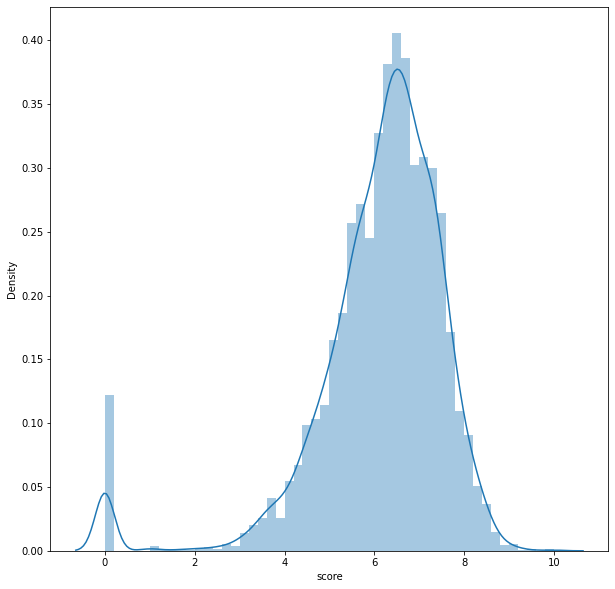

In [8]:
# score ใน dataset นี้

plt.figure(figsize=(10,10))
sns.distplot(aniList['score']);

คะแนนที่เยอะที่สุดจะอยู่ระหว่าง 5-7 คะแนน
น้อยสุด 1-3 และ 9-10

0 คะแนนมีค่อนข้างเยอะเพราะใน dataset นี้รวม anime ที่ไม่ได้เป็นทางการเข้าไปด้วย (doujin, มังงะจากเว็ป, ทางบ้านเขียนเอง)

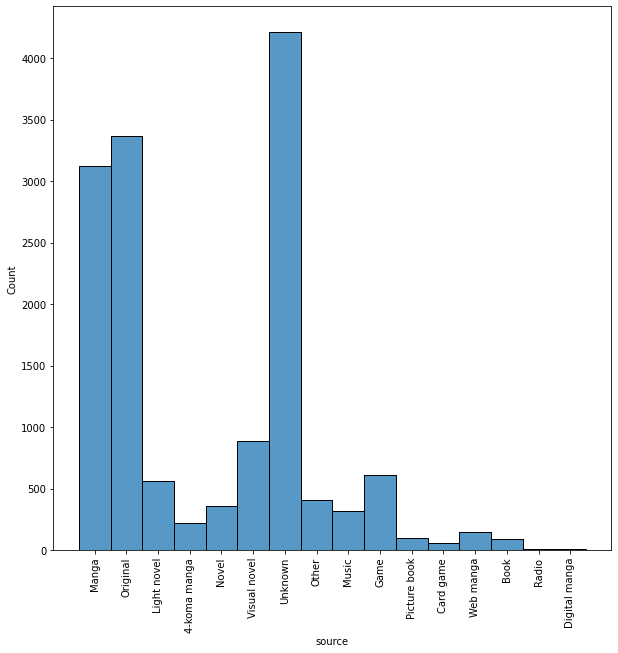

In [9]:
# จำนวนของ source (ที่มา) ทั้งหมดที่มีใน dataset

plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.histplot(aniList, x='source');

### อันดับ 3 Source ที่เยอะที่สุด
1. อันดับ 1 Unknown (เป็นอนิเมะที่ไม่เป็นทางการ ประเภท Doujin ที่ทำขึ้นมาเองไม่ได้ผ่านบริษัท หรือ Indie)
2. อันดับ 2 Original (สร้างโดยบริษัทผลิตอนิเมะเอง ไม่ได้สร้างหรืออ้างอิงจาก Manga หรือ Novel)
3. อันดับ 3 Manga (สร้างจาก Manga)

อันดับทุดท้าย(น้อยสุด) Radio = 9 , และ Digital Manga = 10

## Unknown คืออะไร

In [10]:
percentUnknown = (aniList['source'].loc[aniList['source'] == 'Original'].count() / aniList['source'].count()) * 100
percentUnknown

23.262881613482524

### Unknown เมื่อคิดเป็นเปอร์เข็นต์จากทั้งหมด 23.26%

In [11]:
WhatIsUnknownType = aniList.loc[aniList['type'] == 'Unknown']
WhatIsUnknownType[['title', 'type', 'genre', 'studio', 'producer', 'source']].head(10)

title     type  \
187                                  Sidonia no Kishi 3  Unknown   
511      Fate/Extra: Last Encore - Irusterias Tendouron  Unknown   
1396                                    Hatena☆Illusion  Unknown   
1989                                      Kenja no Mago  Unknown   
2326     Soukyuu no Fafner: Dead Aggressor - The Beyond  Unknown   
2456                                      Kengan Ashura  Unknown   
3235                             Ginga Jinpuu Jinraiger  Unknown   
3292  Watashi, Nouryoku wa Heikinchi de tte Itta yo ne!  Unknown   
3836                            Gi(a)rlish Number Shura  Unknown   
4064                                          Ten Count  Unknown   

                                       genre      studio    producer  \
187     Action, Sci-Fi, Space, Mecha, Seinen         NaN         NaN   
511                   Action, Magic, Fantasy         NaN         NaN   
1396    Comedy, Supernatural, Romance, Ecchi         NaN         NaN   
1989          Action, Comedy, Magic, Fantasy         NaN         NaN   
2326  Action, Military, Sci-Fi, Drama, Mecha  Xebec Zwei         NaN   
2456                    Action, Martial Arts         NaN         NaN   
3235                Action, Adventure, Mecha         NaN  Studio GDW   
3292                         Comedy, Fantasy         NaN         NaN   
3836                          Comedy, Parody         NaN         NaN   
4064                    Drama, Romance, Yaoi         NaN         NaN   

            source  
187          Manga  
511           Game  
1396   Light novel  
1989   Light novel  
2326      Original  
2456         Manga  
3235      Original  
3292   Light novel  
3836  4-koma manga  
4064         Manga

### Unknown เป็นอนิเมะที่ไม่เป็นทางการ เป็น Doujin ที่ทำขึ้นมาเองไม่ได้ผ่านบริษัท เช่น 
* Indie 
* ทางบ้านเขียนขึ้นมาเอง 
* Manga ตามเพจ 
* Manga ตาม Website



### จำนวนของ type ทั้งหมดที่มีใน dataset

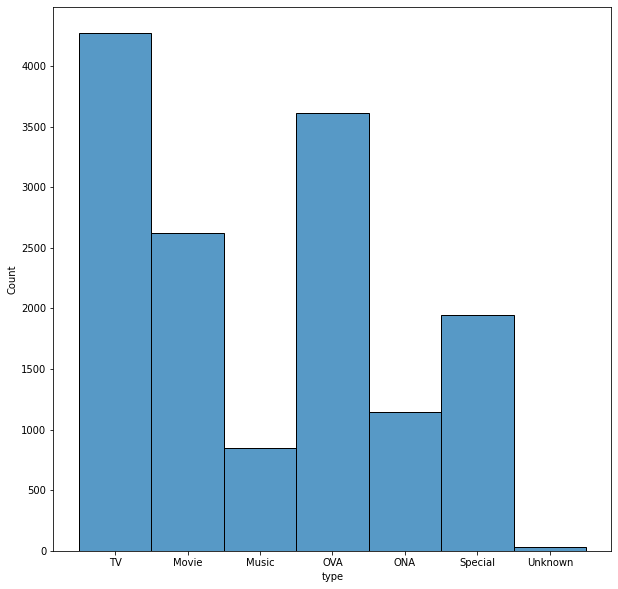

In [12]:
plt.figure(figsize=(10,10))
sns.histplot(aniList, x='type');

### 3 อันดับ Type ที่เยอะที่สุด
1. TV (เพราะอนิเมะในญี่ปุ่นฉายผ่าน TV เป็นหลัก แล้วค่อยนำออกมาขายผ่าน DVD หรือ Blu-ray)
2. OVA (ตอนพิเศษของอนิเมะที่ส่วนมากไม่เกี่ยวกับเนื้อเรื่อง)
3. Movie (ฉายในโรงหนัง)
-
4. Unknown น้อยที่สุด

In [13]:
dictGenre = {}
tmpGenreList = []

for i in aniList["genre"]:
    # print(str(i))
    x = str(i).split(", ")
    # print(x)
    for n in x:
        # if n not in tmpGenreList:
        tmpGenreList.append(n)


for x in tmpGenreList:
    if x in dictGenre.keys():
        dictGenre[x] = int(dictGenre[x])+1
    else:
        dictGenre[x] = 1
        
dictGenre   

{'Comedy': 5251,
 'Supernatural': 1219,
 'Romance': 1634,
 'Shounen': 1771,
 'Parody': 540,
 'School': 1406,
 'Magic': 921,
 'Shoujo': 643,
 'Drama': 2294,
 'Fantasy': 2703,
 'Kids': 2003,
 'Action': 3253,
 'Music': 1351,
 'Slice of Life': 1532,
 'Josei': 81,
 'Harem': 353,
 'Shounen Ai': 79,
 'Adventure': 2582,
 'Super Power': 533,
 'Sci-Fi': 2272,
 'Ecchi': 685,
 'Seinen': 698,
 'Martial Arts': 310,
 'Game': 290,
 'Sports': 624,
 'Demons': 373,
 'Historical': 958,
 'Horror': 413,
 'Mystery': 606,
 'Samurai': 175,
 'Hentai': 1218,
 'Space': 436,
 'Mecha': 1009,
 'Psychological': 288,
 'Police': 221,
 'Vampire': 125,
 'Military': 487,
 'Thriller': 100,
 'nan': 64,
 'Yaoi': 39,
 'Cars': 92,
 'Shoujo Ai': 67,
 'Dementia': 293,
 'Yuri': 41}

C:\Users\chang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


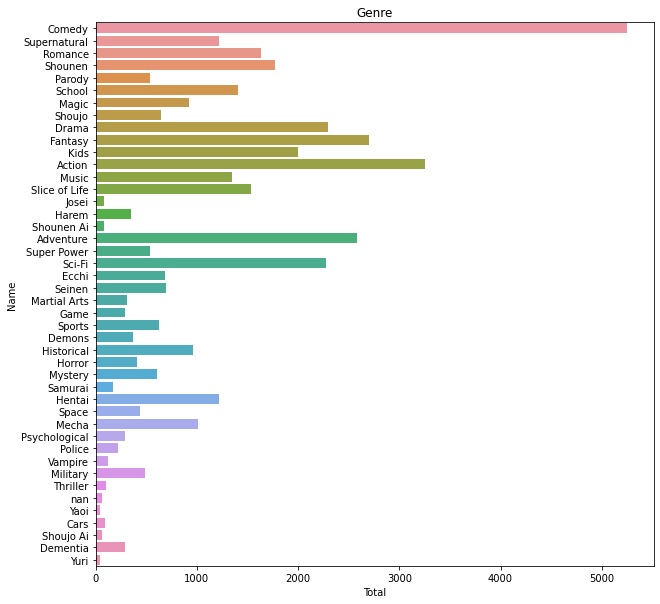

In [14]:
# newGenre = pd.DataFrame(data=dictGenre.keys(),columns=['genre'])
# newGenre = pd.DataFrame(data=dictGenre.values(),columns=['total_genre'])

newGenre = pd.DataFrame({ 'genre': dictGenre.keys(), 'total_genre': dictGenre.values() })

plt.figure(figsize=(10,10))
sns.barplot(newGenre['total_genre'], newGenre['genre'])
plt.title('Genre')
plt.xlabel('Total')
plt.ylabel('Name')
plt.show()

### 3 อันดับ Genre ที่เยอะที่สุด
1. Comedy
2. Action
3. Fantasy

อันดับสุดท้าย น้อยสุด Yaoi = 39 , และ Yuri = 41

In [15]:
newGenre.sort_values("total_genre", ascending=True).head(5)

genre  total_genre
39        Yaoi           39
43        Yuri           41
38         nan           64
41   Shoujo Ai           67
16  Shounen Ai           79

## 10 อันดับอนิเมะ นับจาก score ที่มีใน dataset

In [16]:
TopTenAnime = aniList.loc[aniList['rank']> 0.0]
TopTenAnime[['rank', 'title', 'score']].sort_values('rank', ascending=True).head(10)

rank                             title  score
2555    1.0  Fullmetal Alchemist: Brotherhood   9.25
1028    2.0                    Kimi no Na wa.   9.19
1252    3.0                          Gintama°   9.15
6177    4.0                     Steins;Gate 0   9.15
2999    5.0                       Steins;Gate   9.14
12724   6.0              Ginga Eiyuu Densetsu   9.11
8992    7.0                     Gintama&#039;   9.11
418     8.0            Hunter x Hunter (2011)   9.11
1307    9.0        3-gatsu no Lion 2nd Season   9.10
5783   10.0          Gintama&#039;: Enchousen   9.07

C:\Users\chang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


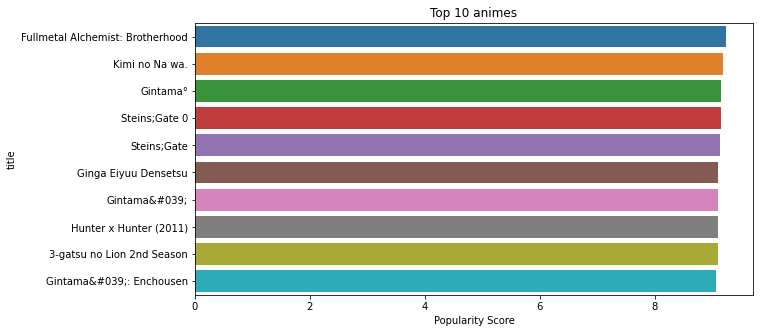

In [17]:
tmpTopTenAnime=TopTenAnime[['rank', 'title', 'score']].sort_values('rank', ascending=True).head(10)
plt.figure(figsize=(10,5))
sns.barplot(tmpTopTenAnime['score'],tmpTopTenAnime['title'])
plt.title('Top 10 animes')
plt.xlabel('Popularity Score')
plt.show()

###  ลอง head ข้อมูลออกมาดู 
#### จากนั้นเปรียบเทียบ อันดับ 3 กับ อันดับ 4

* อันดับ 3 Gintama

In [18]:
TopTenAnime[['title', 'score','scored_by']].loc[TopTenAnime['title'] == "Gintama°"].head()

title  score  scored_by
1252  Gintama°   9.15      71751

* อันดับ 4 Stein;Gate 0

In [19]:
TopTenAnime[['title', 'score', 'scored_by']].loc[TopTenAnime['title'] == "Steins;Gate 0"].head()

title  score  scored_by
6177  Steins;Gate 0   9.15      26739

เมื่อลอง head ออกมา จะเห็นว่า Steins;Gate มีคะแนน 9.14 ซึงน้อยกว่า Gintama 0.01 คะแนนแต่ คนที่โหวดให้ Ginnama กับมีน้อยกว่า Steins;Gate

In [20]:

rating1 = data2[['anime_id','title', 'genre','scored_by','score']]
rating1.drop_duplicates(subset=['anime_id'],inplace=True)
rating1.reset_index(drop=True,inplace=True)

rating1.shape

C:\Users\chang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(14478, 5)

In [21]:
# ค่าเฉลี่ยนของคะแนนโดยรวม
C = rating1['score'].mean()

# เรื่องที่มีอัตราการนับคะแนนโดยรวมมากกว่า 85%
m = rating1['scored_by'].quantile(0.85)
print('m: ', m, 'C: ', C)

m:  12584.449999999999 C:  6.142481696366902


In [22]:
def Iighted_rating(x, m=m, C=C):
    v = x['scored_by']
    R = x['score']
    return (v/(v+m) * R) + (m/(m+v) * C)

    # คำนวณ

In [23]:
# animes having total rate count greater than 85% is considered into lists_animes
lists_animes =rating1.copy().loc[rating1['scored_by'] >= m]

lists_animes['trusted_score'] = lists_animes.apply(Iighted_rating, axis=1)
lists_animes = lists_animes.sort_values('trusted_score', ascending=False)

lists_animes.shape

(2172, 6)

In [24]:
# TOP 10 Most popular anime by trusted score
lists_animes[['title', 'scored_by', 'score', 'trusted_score']].head(10)

title  scored_by  score  \
2555                    Fullmetal Alchemist: Brotherhood     733592   9.25   
1028                                      Kimi no Na wa.     471398   9.19   
2999                                         Steins;Gate     563857   9.14   
418                               Hunter x Hunter (2011)     403377   9.11   
6572                                      Koe no Katachi     296261   9.04   
2783                                Clannad: After Story     363239   9.01   
7403                  Code Geass: Hangyaku no Lelouch R2     543904   8.95   
7105                       Sen to Chihiro no Kamikakushi     498602   8.92   
11640                            Shigatsu wa Kimi no Uso     413527   8.88   
6511   Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...     157934   8.99   

       trusted_score  
2555        9.197591  
1028        9.110759  
2999        9.074560  
418         9.020221  
6572        8.921936  
2783        8.913981  
7403        8.886511  
7105        8.851623  
11640       8.799152  
6511        8.779850

### อันดับจริงๆ ของอนิเมะแต่ละเรื่องคำนวณจาก คนที่มาโหวดด้วย

C:\Users\chang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


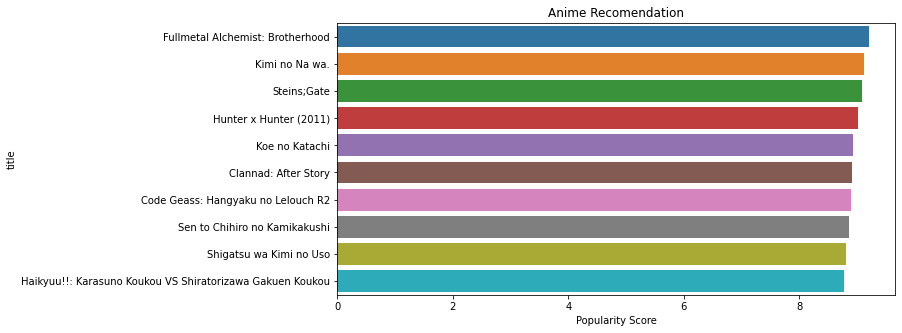

In [25]:
pop=lists_animes[['title', 'scored_by', 'score', 'trusted_score']].head(10)
plt.figure(figsize=(10,5))
sns.barplot(pop['trusted_score'],pop['title'])
plt.title('Anime Recomendation')
plt.xlabel('Popularity Score')
plt.show()


จะเห็นว่าต่างจากก่อนหน้า เมื่อนำจำนวนคนที่มาโหวดด้วย

ก่อน
1. Fullmetal Alchemist: Brotherhood
2. Kimi no Na wa.
3. Gintama
4. Steins;Gate 0
5. Steins;Gate

หลัง
1. Fullmetal Alchemist: Brotherhood
2. Kimi no Na wa.
3. Steins;Gate
4. Hunter x Hunter (2011)
5. Koe no Katachi

# **Content Based Recomendation**

In [26]:
lists_animes.head()

anime_id                             title  \
2555      5114  Fullmetal Alchemist: Brotherhood   
1028     32281                    Kimi no Na wa.   
2999      9253                       Steins;Gate   
418      11061            Hunter x Hunter (2011)   
6572     28851                    Koe no Katachi   

                                                  genre  scored_by  score  \
2555  Action, Military, Adventure, Comedy, Drama, Ma...     733592   9.25   
1028               Supernatural, Drama, Romance, School     471398   9.19   
2999                                   Thriller, Sci-Fi     563857   9.14   
418             Action, Adventure, Super Power, Shounen     403377   9.11   
6572                             Drama, School, Shounen     296261   9.04   

      trusted_score  
2555       9.197591  
1028       9.110759  
2999       9.074560  
418        9.020221  
6572       8.921936

In [27]:
def combine_string(row):
  res = [str(r) for r in row]
  return ' | '.join(res)
  # ฟังก์ชัน combine string

In [28]:
data3=aniList.copy()

cb = ['title', 'genre','type','studio', 'source'] # 

data3['describe'] = data3[cb].apply(combine_string,axis = 1)
#data3['describe'].fillna(' ')

#data3.head()

# สร้าง dataset ใหม่ ชื่อ data3 และเพิ่ม column ใหม่คือ describe ซึ่งเอา genre type episodes มาผสมกัน

# considering the anime content
#data3['describe']=data3['genre'],data3['type'],data3['episodes']
#data3['describe'].fillna(' ')
#data3.head()

data3.drop_duplicates(subset=['title'],inplace=True)
data3.reset_index(drop=True,inplace=True)
data3.shape


(14477, 32)

## **Feature Engineering**

*   TfidfVectorizer คือ algorithm ที่เลือกใช้ ซึ่งจะช่วยเราจัดการกับข้อความ Eng 
*   จะคืนค่ามาเป็น matrix ซึ่งแทนความใกล้เคียงกันของข้อมูลที่เราเปรียบเทียบ





In [29]:
tf = CountVectorizer(ngram_range=(1,2), stop_words='english')
tf_matrix = tf.fit_transform(data3['describe'])

test_simil = cosine_similarity(tf_matrix,tf_matrix)

id=data3['anime_id'].values

test_simil = pd.DataFrame(test_simil, index=id, columns=id)

test_simil.columns = data3['title']

test_simil['anime_name'] = data3['title'].values

test_simil.head()

title  Inu x Boku SS  Seto no Hanayome  Shugo Chara!! Doki  Princess Tutu  \
11013       1.000000          0.300376            0.150188       0.136505   
2104        0.300376          1.000000            0.210526       0.143509   
5262        0.150188          0.210526            1.000000       0.143509   
721         0.136505          0.143509            0.143509       1.000000   
12365       0.350438          0.315789            0.157895       0.239182   

title  Bakuman. 3rd Season  Yume-iro Pâtissière  Ultra Maniac  \
11013             0.350438             0.087287      0.238095   
2104              0.315789             0.137649      0.300376   
5262              0.157895             0.275299      0.400501   
721               0.239182             0.041703      0.182006   
12365             1.000000             0.091766      0.200250   

title  Shakugan no Shana II (Second)  Nodame Cantabile: Paris-hen  \
11013                       0.125988                     0.174574   
2104                        0.176604                     0.183533   
5262                        0.088302                     0.137649   
721                         0.160514                     0.125109   
12365                       0.220755                     0.321182   

title  Ouran Koukou Host Club  Junjou Romantica 2  Kaichou wa Maid-sama!  \
11013                0.182006            0.285714               0.190476   
2104                 0.287019            0.250313               0.300376   
5262                 0.334855            0.150188               0.350438   
721                  0.130435            0.227508               0.136505   
12365                0.191346            0.450564               0.350438   

title  Sekaiichi Hatsukoi 2  Tonari no Kaibutsu-kun    Bleach   Chobits  \
11013              0.285714                0.167984  0.273009  0.190476   
2104               0.250313                0.264906  0.239182  0.200250   
5262               0.150188                0.309058  0.143509  0.150188   
721                0.227508                0.120386  0.086957  0.227508   
12365              0.450564                0.176604  0.239182  0.350438   

title  Kimi ni Todoke  Naruto: Shippuuden   Ranma ½  Toradora!  \
11013        0.227508            0.209980  0.142857   0.150188   
2104         0.239182            0.220755  0.150188   0.263158   
5262         0.287019            0.132453  0.150188   0.157895   
721          0.130435            0.080257  0.182006   0.143509   
12365        0.239182            0.220755  0.150188   0.263158   

title  Bakuman. 2nd Season  Gakuen Alice  Skip Beat!  Chihayafuru 2  \
11013             0.350438      0.142857    0.190476       0.095238   
2104              0.315789      0.200250    0.200250       0.150188   
5262              0.157895      0.300376    0.250313       0.150188   
721               0.239182      0.091003    0.500517       0.091003   
12365             0.842105      0.150188    0.350438       0.150188   

title  Shounen Onmyouji  Chihayafuru  Itazura na Kiss  Beelzebub  \
11013          0.125988     0.095238         0.200250   0.285714   
2104           0.088302     0.150188         0.210526   0.350438   
5262           0.176604     0.150188         0.263158   0.200250   
721            0.120386     0.091003         0.143509   0.091003   
12365          0.088302     0.150188         0.210526   0.250313   

title  Hanasakeru Seishounen  SKET Dance  B-gata H-kei  Crayon Shin-chan  \
11013               0.158777    0.370479      0.162088          0.121566   
2104                0.166924    0.389490      0.213007          0.170406   
5262                0.222566    0.222566      0.170406          0.170406   
721                 0.151717    0.101144      0.348481          0.077440   
12365               0.278207    0.278207      0.170406          0.127804   

title  Fruits Basket  Saiunkoku Monogatari  One Piece  Glass no Kamen (2005)  \
11013       0.174574              0.136505   0.218218

ซึ่งยิ่งค่า Matrix สูงเท่าไหร่ ก็หมายถึงความใกล้เคียงของข้อมูล สูงสุดคือ 1.000000

# **Modeling**

## **Benchmark**

* เปรียบเทียบ (ข้อมูล และ เวลา) ระหว่าง TfidfVectorizer และ CountVectorize
* เปรียบเทียบ เวลาระหว่าง Cosine Similarity กับ Linear Karnel

In [32]:
# tf_linear = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
# tf_cosine = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
# cv_linear = CountVectorizer(ngram_range=(1,2), stop_words='english')
# cv_cosine = CountVectorizer(ngram_range=(1,2), stop_words='english')

def Racing(driver, co_driver):

    start = time.time()

    if driver == "tf":
        newData = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
    else:
        newData = CountVectorizer(ngram_range=(1,2), stop_words='english')

    matrix = newData.fit_transform(data3['describe'])

    if co_driver == "cosine":
        similarity = cosine_similarity(matrix,matrix)
    else:
        similarity = linear_kernel(matrix,matrix)

    end = time.time()
    
    timeResults = round(end - start ,2)
    return similarity, timeResults

In [31]:
tf_simil_cosine, tf_consine_time = Racing("tf", "cosine")
tf_simil_linear, tf_linear_time = Racing("tf", 'linear')
cv_simil_cosine, cv_consine_time = Racing("cnt", 'cosine')
cv_simil_linear, cv_linear_time = Racing("cnt", 'linear')

print(
f"""
    TfidfVectorizer Cosine Similarity   Speed {tf_consine_time}  Second
    TfidfVectorizer Linear Karnel       Speed {tf_linear_time}   Second
    CountVectorizer Cosine Similarity   Speed {cv_consine_time}  Second
    CountVectorizer Linear Karnel       Speed {cv_linear_time}   Second
"""
)


    TfidfVectorizer Cosine Similarity   Speed 3.51  Second
    TfidfVectorizer Linear Karnel       Speed 3.47   Second
    CountVectorizer Cosine Similarity   Speed 3.15  Second
    CountVectorizer Linear Karnel       Speed 3.06   Second



### สรุปได้ว่า  Linear Karnel นั้นมีความเร็วมากกว่า Cosine Similarity หากใช้ TfidfVectorizer 

*   TfidfVectorizer เร็วกว่า CountVectorizer 

*   CountVectorizer ในส่วนของความเร็วระหว่าง Cosine และ Linear ต่างกันน้อยมาก





In [33]:
#cosine_similarity cell
# เตรียมข้อมูลที่คำนวณได้ให้พร้อมสำหรับการแสดงผล

def PrepareDataForDisplay(newData):
    newId = data3['anime_id'].values
    newData = pd.DataFrame(newData, index=newId, columns=newId)
    newData.columns = data3['title']
    newData['anime_name'] = data3['title'].values
    return newData

# id_tf_linear=data3['anime_id'].values
# tf_simil_linear = pd.DataFrame(tf_simil_linear, index=id_tf_linear, columns=id_tf_linear)
# tf_simil_linear.columns = data3['title']
# tf_simil_linear['anime_name'] = data3['title'].values

tf_simil_cosine = PrepareDataForDisplay(tf_simil_cosine)
tf_simil_linear = PrepareDataForDisplay(tf_simil_linear)
cv_simil_cosine = PrepareDataForDisplay(cv_simil_cosine)
cv_simil_linear = PrepareDataForDisplay(cv_simil_linear)

#  คำนวณค่าเฉลี่ยต่างๆจาก algo TfidfVectorizer

In [34]:
# โชว์รายการที่ใกล้เคียงกับชื่ออนิเมะที่กรอกโดยอิงจาก genre, episode , type โดยคำนวณมาจาก TfidfVectorizer ซึ่งใช้วิธีแบบ linear_karnel

contentList = ['title','genre','type','source','studio']

def Similarity(name,pData,total):
  index = pData[pData['anime_name']== name]
  index = index.drop('anime_name',axis = 1 ).T
  

  index.columns = ['Similarity Score']
  
  for i in range(len(contentList)):
      index[[contentList[i].capitalize()]] = data3[[contentList[i]]].values
      
  index = index.sort_values(by='Similarity Score', ascending=False)

  return pd.DataFrame(index.head(total))

Test Variable

TFvec = tf_simil_linear , tf_simil_cosine
CountVec = cv_simil_linear, cv_simil_cosine

### **เปรียบเทียบ ข้อมูล ระหว่าง Tf_vec กับ Cnt_vec ด้วยการใช้ Linear Karnel**


โดยอิงจากความใกล้เคียงกันของข้อมูลประเภท **Title, Genre, Type, Source, Studio**

In [35]:
searchAnime = 'Log Horizon'

In [36]:
Similarity(searchAnime, tf_simil_cosine, 5)

Similarity Score                     Title  \
title                                                                  
Log Horizon                       1.000000               Log Horizon   
Log Horizon Recap                 0.388387         Log Horizon Recap   
Log Horizon 2nd Season            0.356211    Log Horizon 2nd Season   
Kyoukaisenjou no Horizon          0.326536  Kyoukaisenjou no Horizon   
Overlord                          0.311794                  Overlord   

                                                                      Genre  \
title                                                                         
Log Horizon                         Action, Game, Adventure, Magic, Fantasy   
Log Horizon Recap                Action, Adventure, Fantasy, Magic, Shounen   
Log Horizon 2nd Season              Action, Adventure, Fantasy, Game, Magic   
Kyoukaisenjou no Horizon                                    Action, Fantasy   
Overlord                  Action, Game, Adventure, Supernatural, Magic, ...   

                             Type       Source       Studio  
title                                                        
Log Horizon                    TV        Novel    Satelight  
Log Horizon Recap         Special  Light novel    Satelight  
Log Horizon 2nd Season         TV        Novel  Studio Deen  
Kyoukaisenjou no Horizon       TV  Light novel      Sunrise  
Overlord                       TV  Light novel     Madhouse

In [37]:
Similarity(searchAnime, tf_simil_linear, 5)

Similarity Score                     Title  \
title                                                                  
Log Horizon                       1.000000               Log Horizon   
Log Horizon Recap                 0.388387         Log Horizon Recap   
Log Horizon 2nd Season            0.356211    Log Horizon 2nd Season   
Kyoukaisenjou no Horizon          0.326536  Kyoukaisenjou no Horizon   
Overlord                          0.311794                  Overlord   

                                                                      Genre  \
title                                                                         
Log Horizon                         Action, Game, Adventure, Magic, Fantasy   
Log Horizon Recap                Action, Adventure, Fantasy, Magic, Shounen   
Log Horizon 2nd Season              Action, Adventure, Fantasy, Game, Magic   
Kyoukaisenjou no Horizon                                    Action, Fantasy   
Overlord                  Action, Game, Adventure, Supernatural, Magic, ...   

                             Type       Source       Studio  
title                                                        
Log Horizon                    TV        Novel    Satelight  
Log Horizon Recap         Special  Light novel    Satelight  
Log Horizon 2nd Season         TV        Novel  Studio Deen  
Kyoukaisenjou no Horizon       TV  Light novel      Sunrise  
Overlord                       TV  Light novel     Madhouse

-> TfidfVectorizer เป็นไปตามที่เราต้องการมากกว่า CountVectorizer เพราะชื่อเรื่อง และ Season มีความใกล้เคียงกัน

### **เปรียบเทียบ ข้อมูล ระหว่าง Tf_vec กับ Cnt_vec ด้วยการใช้ Cosine Similarity**

In [38]:
Similarity(searchAnime, cv_simil_cosine, 5)

Similarity Score                       Title  \
title                                                                      
Log Horizon                         1.000000                 Log Horizon   
Overlord                            0.550689                    Overlord   
Tales of Zestiria the X             0.500773     Tales of Zestiria the X   
Dia Horizon (Kabu)                  0.473684          Dia Horizon (Kabu)   
Hangyakusei Million Arthur          0.473684  Hangyakusei Million Arthur   

                                                                        Genre  \
title                                                                           
Log Horizon                           Action, Game, Adventure, Magic, Fantasy   
Overlord                    Action, Game, Adventure, Supernatural, Magic, ...   
Tales of Zestiria the X                     Action, Adventure, Magic, Fantasy   
Dia Horizon (Kabu)                          Action, Adventure, Magic, Fantasy   
Hangyakusei Million Arthur                  Action, Adventure, Magic, Fantasy   

                           Type       Source     Studio  
title                                                    
Log Horizon                  TV        Novel  Satelight  
Overlord                     TV  Light novel   Madhouse  
Tales of Zestiria the X      TV         Game   ufotable  
Dia Horizon (Kabu)           TV     Original   Fanworks  
Hangyakusei Million Arthur   TV         Game        NaN

In [39]:
Similarity(searchAnime, cv_simil_linear, 5)

Similarity Score                       Title  \
title                                                                      
Log Horizon                             19.0                 Log Horizon   
Overlord                                11.0                    Overlord   
Log Horizon 2nd Season                  10.0      Log Horizon 2nd Season   
Hangyakusei Million Arthur               9.0  Hangyakusei Million Arthur   
Log Horizon Recap                        9.0           Log Horizon Recap   

                                                                        Genre  \
title                                                                           
Log Horizon                           Action, Game, Adventure, Magic, Fantasy   
Overlord                    Action, Game, Adventure, Supernatural, Magic, ...   
Log Horizon 2nd Season                Action, Adventure, Fantasy, Game, Magic   
Hangyakusei Million Arthur                  Action, Adventure, Magic, Fantasy   
Log Horizon Recap                  Action, Adventure, Fantasy, Magic, Shounen   

                               Type       Source       Studio  
title                                                          
Log Horizon                      TV        Novel    Satelight  
Overlord                         TV  Light novel     Madhouse  
Log Horizon 2nd Season           TV        Novel  Studio Deen  
Hangyakusei Million Arthur       TV         Game          NaN  
Log Horizon Recap           Special  Light novel    Satelight

### ในส่วนนี้จะเป็นการลองเอา cosine มาทดสอบบ้างโดยเทียบกับ linear (ด้านบน)
* ในด้านข้อมูลนั้นไม่ต่างกันมากจะต่างกันคือในลำดับที่ 10 เป็นต้นไป
* ในด้านเวลา 
    *   Cosine Similarity Speed :  4.49  Second
    *   Linear Karnel Speed :  4.24  Second

## **สรุป**

*   ใช้  TfidfVectorizer เพราะชื่ออนิเมะที่ค้นหา ค่อนข้างตรงตามที่เราต้องการ
*   ใช้ Linear เพราะเร็วกว่า Cosine 



# **Pipeline**

In [40]:
class PipeLine:
    def __init__(self, data: pd.DataFrame):
        self.aniList = data.copy()
        self.contentList = ['title', 'genre', 'type','source','studio'] 
        self.tf_simil_linear = pd.DataFrame
    # Preparing data 
    def Prepare(self):
        def combine_string(row):
            res = [str(r) for r in row]
            return ' | '.join(res)

        self.aniList['describe'] = self.aniList[self.contentList].apply(combine_string,axis = 1)

        self.aniList.drop_duplicates(subset=['title'],inplace=True)
        self.aniList.reset_index(drop=True,inplace=True)

        return self.aniList
    # Feature engineering
    def Matrix(self):
        
        newData = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
        matrix = newData.fit_transform(self.aniList['describe'])
        similarity = linear_kernel(matrix,matrix)

        return similarity
    # Matrix
    def NewData(self, newData):
        newId = self.aniList['anime_id'].values
        newData = pd.DataFrame(newData, index=newId, columns=newId)
        newData.columns = self.aniList['title']
        newData['anime_name'] = self.aniList['title'].values
        return newData
    # Just Raw data. This return just a similarity matrix. Then we will work with this in deploy.
    def Raw_data(self):
        return pd.DataFrame(self.tf_simil_linear), self.aniList
    # Execute
    def Execution(self):
        self.aniList = self.Prepare()
        self.tf_simil_linear = self.Matrix()
        self.tf_simil_linear = self.NewData(self.tf_simil_linear)

### เรียกใช้ Pipeline

In [41]:
pipe = PipeLine(aniList)
pipe.Execution() # Execution to get raw data ( Matrix Similarity ) from class

raw_var, aniList = pipe.Raw_data()  # This is raw data ( Matrix Similarity ) from TFvec and Linear karnel
# Get raw data ( Matrix Similarity ) from Class

### สร้างฟังก์ชันสำหรับใช้ในการ Deploy 

In [42]:
contentList = ['title', 'genre', 'type','source','studio'] 

def Similarity(name,pData):
    index = pData[pData['anime_name']== name]
    index = index.drop('anime_name',axis = 1 ).T
    
    index.columns = ['Similarity Score']
    
    for i in range(len(contentList)):
        index[[contentList[i].capitalize()]] = aniList[[contentList[i]]].values
        
    index = index.sort_values(by='Similarity Score', ascending=False)

    return pd.DataFrame(index[['Title', 'Type', 'Genre', 'Source', 'Studio', 'Similarity Score']].head(10))

In [43]:
# Deploy function
def deploy_med(name):
    # Rawdata => Similarity function => Data that already sorted and ready for deploy
    return Similarity(name,raw_var)


# **Deployment**

In [44]:
iface = gr.Interface(deploy_med,
                    inputs=[gr.inputs.Textbox(label='Anime Name', default='One Piece')],
                    outputs=[gr.outputs.Dataframe(label='Anime Recomendation')])

iface.launch(debug=True)

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


# **Reference**

* https://www.kaggle.com/lavanyaanandm/recommending-anime-s-using-all-recommendation-sys#10.-Reference-
* https://www.kaggle.com/azathoth42/myanimelist?select=AnimeList.csv
* https://github.com/MacClay/CS434


# **Members**

* 1620703130 พันกร หวังสกุล 
* 1620705234 เทวฤทธิ์ จันทรศร